In [25]:
from keras.datasets import boston_housing
import tqdm

In [26]:
(x_train,y_train) ,(x_test,y_test) = boston_housing.load_data()

In [27]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [28]:
mean = x_train.mean(axis = 0)
x_train-=mean
std = x_train.std(axis = 0)
x_train /=std

x_test -=mean
x_test /=std

In [29]:
x_train[0].sum()

0.34001350427214533

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Activation

In [31]:
def build_model():
    
    model = Sequential([
        
        Dense(64,input_shape=(x_train.shape[1],)),
        Activation('relu'),
        Dense(64),
        Activation('relu'),
        Dense(1)
    ])
    
    model.compile(
        optimizer='rmsprop',
        loss ='mse',
        metrics = ['mae']
    )
    
    return model

In [35]:
import numpy as np

k = 4 
num_val_samples = len(x_train)//k
epoch = 100
all_score = list()
all_mae_histroy = list()
for idx in tqdm.tqdm(range(k)):
    print(idx ,'번째 처리 중 ')
    val_data = x_train[idx * num_val_samples:(idx+1) * num_val_samples]
    val_label = y_train[idx * num_val_samples:(idx + 1 )* num_val_samples]
    
    partial_train_data = np.concatenate(
    
        [
            x_train[:idx * num_val_samples],
            x_train[(idx+1)*num_val_samples:]
        ],
            axis = 0
        
    )
    
    partial_test_data = np.concatenate(
        [
            y_train[:idx * num_val_samples],
            y_train[(idx+1) * num_val_samples:]
        ],
            axis = 0
        
    )
    
    model = build_model()
    history = model.fit(
        partial_train_data,
        partial_test_data,
        epochs = epoch,
        batch_size = 1,
        verbose = 0
    )
    
    val_mse, val_mae = model.evaluate(val_data,val_label,verbose = 0)
    all_score.append(val_mae)
    mae_history = history.history['mae'] 

    all_mae_histroy.append(mae_history)

  0%|          | 0/4 [00:00<?, ?it/s]

0 번째 처리 중 


 25%|██▌       | 1/4 [00:09<00:27,  9.33s/it]

1 번째 처리 중 


 50%|█████     | 2/4 [00:18<00:18,  9.34s/it]

2 번째 처리 중 


 75%|███████▌  | 3/4 [00:28<00:09,  9.40s/it]

3 번째 처리 중 


100%|██████████| 4/4 [00:37<00:00,  9.36s/it]


In [37]:
avaerage_mae_history = [
    np.mean([x[i] for x in all_mae_histroy] ) for i in range(epoch)
]

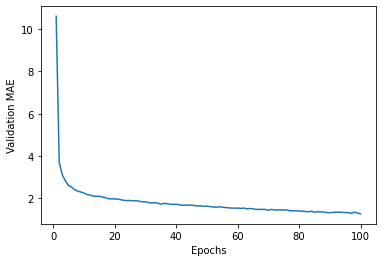

In [43]:
import matplotlib.pyplot as plt

plt.plot( range(1, len(avaerage_mae_history)+1) , avaerage_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [44]:
def smooth_curve(points, factor = 0.9):
    
    smoothed_point = []
    
    for point in points:
        if smoothed_point:
            previous = smoothed_point[-1]
            smoothed_point.append(previous * factor +point *(1-factor))
        else:
            smoothed_point.append(point)
    return smoothed_point

In [51]:
smooth_mae_history = smooth_curve(avaerage_mae_history[10:])

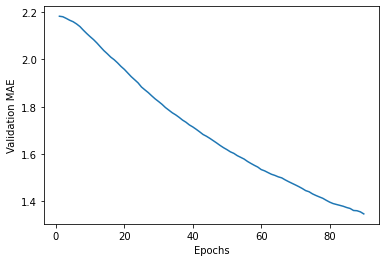

In [53]:
plt.plot( range(1, len(smooth_mae_history)+1) , smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [54]:
model = build_model()
model.fit(
    x_train,
    y_train,
    epochs = 150,
    batch_size = 16,
    verbose = 0
         )

In [56]:
mse_t, mae_t = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 665us/step - loss: 14.3034 - mae: 2.4665


In [57]:
print (mse_t, mae_t)

14.303414344787598 2.466517686843872
